Raw Dataset:


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0



Dataset after Feature Engineering:


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Delivery Duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0



Dataset after Handling Missing Values:


,total_onshift_dashers,subtotal,Delivery Duration
0,33.0,3441,3779.0
1,1.0,1900,4024.0
2,1.0,1900,1781.0
3,1.0,6900,3075.0
4,6.0,3900,2390.0



Normalized Data:


,total_onshift_dashers,subtotal,Delivery Duration
0,-0.341972,0.405880,0.554027
1,-1.268815,-0.436519,0.702748
2,-1.268815,-0.436519,-0.658804
3,-1.268815,2.296768,0.126683
4,-1.123996,0.656796,-0.289127


C:\Users\hi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Clustered DataFrame:


,total_onshift_dashers,subtotal,Delivery Duration,Cluster
0,33.0,3441,3779.0,0
1,1.0,1900,4024.0,0
2,1.0,1900,1781.0,0
3,1.0,6900,3075.0,0
4,6.0,3900,2390.0,0


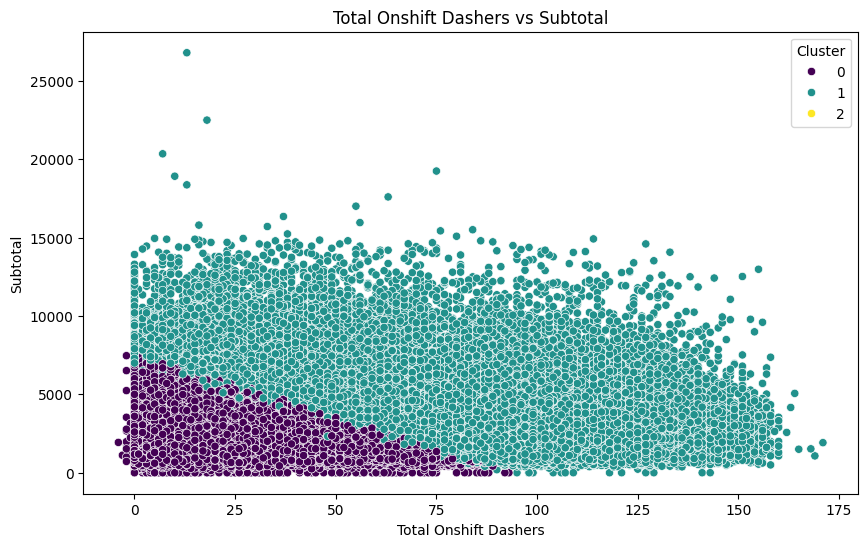

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import display

class DataWrangler:
    def __init__(self, url):
        self.url = url
        self.df = None
        self.features = None
        self.features_scaled = None
        self.clustered_df = None

    def load_data(self):
        # Load the dataset
        self.df = pd.read_csv(self.url)
        print("Raw Dataset:")
        display(self.df.head())

    def preprocess_data(self):
        # Convert datetime columns to datetime objects
        self.df['created_at'] = pd.to_datetime(self.df['created_at'])
        self.df['actual_delivery_time'] = pd.to_datetime(self.df['actual_delivery_time'])

        # Feature engineering
        self.df['Delivery Duration'] = (self.df['actual_delivery_time'] - self.df['created_at']).dt.total_seconds()

        # Print the first few rows after feature engineering
        print("\nDataset after Feature Engineering:")
        display(self.df.head())

    def select_features(self):
        # Select relevant columns for clustering
        self.features = self.df[['total_onshift_dashers', 'subtotal', 'Delivery Duration']]

        # Handle missing values if any
        self.features = self.features.dropna()

        # Print the first few rows after handling missing values
        print("\nDataset after Handling Missing Values:")
        display(self.features.head())

    def normalize_data(self):
        # Normalize data
        scaler = StandardScaler()
        self.features_scaled = scaler.fit_transform(self.features)
        self.features_scaled = pd.DataFrame(self.features_scaled, columns=self.features.columns)

        # Print the first few rows of the normalized data
        print("\nNormalized Data:")
        display(self.features_scaled.head())

    def apply_kmeans(self, n_clusters=3):
        # Apply K-Means clustering algorithm to the normalized data
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(self.features_scaled)

        # Create a new DataFrame with the cluster labels
        self.clustered_df = self.features.copy()
        self.clustered_df['Cluster'] = kmeans.labels_

        # Print the first few rows of the dataframe with cluster labels to verify the changes
        print("\nClustered DataFrame:")
        display(self.clustered_df.head())

    def visualize_clusters(self):
        # Visualize clusters
        plt.figure(figsize=(10, 6))

        # Scatter Plot: Total Onshift Dashers vs Subtotal
        sns.scatterplot(x=self.clustered_df['total_onshift_dashers'], y=self.clustered_df['subtotal'], hue=self.clustered_df['Cluster'], palette='viridis')
        plt.xlabel('Total Onshift Dashers')
        plt.ylabel('Subtotal')
        plt.title('Total Onshift Dashers vs Subtotal')
        plt.legend(title='Cluster')
        plt.show()

# Usage
url = 'https://raw.githubusercontent.com/marcanthonny/projectDSML/refs/heads/main/historical_data.csv'
data_wrangler = DataWrangler(url)
data_wrangler.load_data()
data_wrangler.preprocess_data()
data_wrangler.select_features()
data_wrangler.normalize_data()
data_wrangler.apply_kmeans(n_clusters=3)
data_wrangler.visualize_clusters()